## prediction of digits photos


In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

### MNIST handwritten digits

**scaling the data**

In [2]:
digits = load_digits()
#X = scale(digits.data)
X = digits.data
X1 = digits.data

#print(X[0])
#print(X1[0])
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


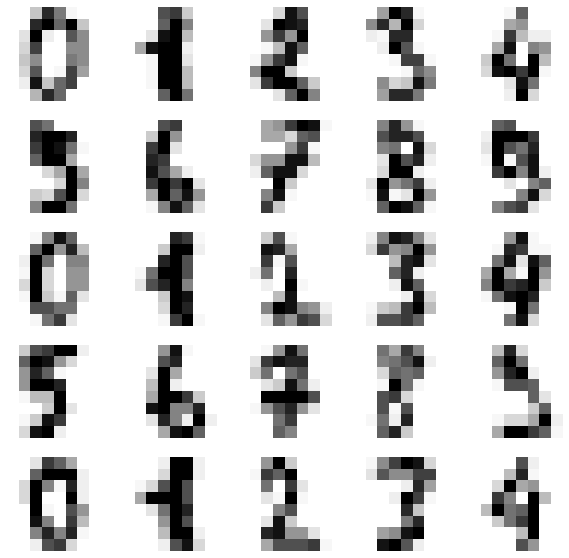

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


**confusion matrix and split**

In [5]:
from sklearn.metrics import confusion_matrix

# data split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)


In [6]:
#trying various algo's
clf1 = tree.DecisionTreeClassifier()
clf2 = RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors=5)

algName=["DT","RandomForest","NB","knn"]


for id,clf in enumerate([clf1,clf2,clf3,clf4]):
    clf.fit(XTrain,yTrain)
    
    print(algName[id])
    print("++++++++++")
    y_pred = clf.predict(XTest)
    y_pred_train = clf.predict(XTrain)

    # Print results
    print('Accuracy on Train data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
    print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

    print(confusion_matrix(yTest, y_pred))


DT
++++++++++
Accuracy on Train data=  1.0
Accuracy on test data=  0.8487208008898777
[[77  0  1  0  3  0  0  0  1  1]
 [ 0 80  5  1  0  0  0  1  4  2]
 [ 0  1 72  1  5  1  0  1  4  0]
 [ 0  0  2 78  0  0  0  5  4  9]
 [ 0  0  0  0 88  2  5  1  3  1]
 [ 0  0  0  1  3 75  1  0  1  0]
 [ 0  0  0  0  4  0 82  1  0  1]
 [ 0  0  1  1  6  1  0 71  1  8]
 [ 0  1  1  4  6  3  0  2 61  3]
 [ 1  1  0 10  1  3  0  4  2 79]]
RandomForest
++++++++++
Accuracy on Train data=  1.0
Accuracy on test data=  0.9721913236929922
[[81  0  0  0  2  0  0  0  0  0]
 [ 0 92  0  0  0  1  0  0  0  0]
 [ 0  0 85  0  0  0  0  0  0  0]
 [ 0  0  0 92  0  0  0  3  2  1]
 [ 0  0  0  0 99  0  0  1  0  0]
 [ 0  0  0  0  1 78  1  0  1  0]
 [ 0  0  0  0  0  0 88  0  0  0]
 [ 0  0  0  0  0  0  0 88  0  1]
 [ 0  0  1  0  0  0  0  0 80  0]
 [ 0  1  0  1  0  2  0  4  2 91]]
NB
++++++++++
Accuracy on Train data=  0.8964365256124721
Accuracy on test data=  0.8464961067853171
[[78  1  0  0  2  0  0  1  1  0]
 [ 0 78  2  0  0  0  0

In [7]:
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()
parameters = {'max_depth':(3,5,10), 'min_samples_split':[10, 15,20]}
clfCV = GridSearchCV(clf, parameters, cv=10)
clfCV.fit(X, y)

am=np.argmax(clfCV.cv_results_["mean_test_score"])
print("DT")
print("best value {} for permutation {}".format(clfCV.cv_results_["mean_test_score"][am],clfCV.cv_results_["params"][am]))

clf = KNeighborsClassifier(n_neighbors=10)
parameters = {'n_neighbors':(5,10,100,200)}
clfCV = GridSearchCV(clf, parameters, cv=5)
clfCV.fit(X, y)

am=np.argmax(clfCV.cv_results_["mean_test_score"])
print("knn")
print("best value {} for permutation {}".format(clfCV.cv_results_["mean_test_score"][am],clfCV.cv_results_["params"][am]))


C:\Users\moshi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DT
best value 0.8247078464106845 for permutation {'max_depth': 10, 'min_samples_split': 10}
knn
best value 0.9627156371730662 for permutation {'n_neighbors': 5}
